### Script for EKE generation terms from Eqn (5) and (6) from Yung 2022

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc
rc('font', **{'size':40})
#rc('text', usetex=True)
rc('xtick', labelsize=40) #20 
rc('ytick', labelsize=40) #20
rc('axes', titlesize=40)    # fontsize of the axes title
rc('axes', labelsize=40) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:
folder = '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/'
inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah1p0e+02/'#51-71 for time series wide steep, 30,50 narrow steep
outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/'
#folder = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/'
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_irregular/'
#folder = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/'
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular/'
#folder = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg/'
#inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_zerocanyon_irregular_doubleg/'
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_zerocanyon_doubleg/'
#folder = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/'
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_irregular_halfg/'
#folder = '/scratch/v45/qo9901/mom6/archive/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_0p5kmres/'
#inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah1p0e+02_0p5kmres/'#51-71 for time series wide steep, 30,50 narrow steep
#outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_0p5kmres/'

In [5]:
inputfolder = ''

In [6]:
print(folder)
print(inputfolder)

/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/



In [11]:
if not os.path.exists(outfolder):
    os.makedirs(outfolder)
    
print("Output graphs will be saved in folder: "+outfolder)

Output graphs will be saved in folder: //g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/


In [12]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 4,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40107,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 4
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:46075,Total threads: 1
Dashboard: /proxy/43605/status,Memory: 62.50 GiB
Nanny: tcp://127.0.0.1:45939,


In [13]:
from matplotlib import ticker, cm

In [14]:
%%time
FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_daily.nc' for i in range(51,71)] #20,70 for original wide, 51,71 for wide steep

print(FileList)
dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h', 'uh','vh']], engine='netcdf4', parallel=True)
dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)


['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output051/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output052/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output053/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output054/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output055/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output056/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/output057/prog_daily.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/o

In [15]:
dsx_prog_daily

<xarray.Dataset>
Dimensions:  (Time: 7300, zi: 5, yh: 500, xh: 1000, zl: 4, xq: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * zi       (zi) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 1.028e+03
Data variables:
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(20, 5, 500, 1000), meta=np.ndarray>
    h        (Time, zl, yh, xh) float32 dask.array<chunksize=(20, 4, 500, 1000), meta=np.ndarray>
    uh       (Time, zl, yh, xq) float32 dask.array<chunksize=(20, 4, 500, 1000), meta=np.ndarray>
    vh       (Time, zl, yq, xh) float32 dask.array<chunksize=(20, 4, 500, 1000), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          Navid Channel
    grid_type:      regular
    grid_tile:      N/A

In [16]:
##Grid interpolation

In [17]:
import xgcm
grid = xr.open_mfdataset(folder+'output0*/ocean_geometry.nc', combine='by_coords')
grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
grid_new

<xarray.Dataset>
Dimensions:  (yh: 500, xh: 1000, yq: 500, xq: 1000)
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    D        (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    f        (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [18]:
ds = xr.merge([dsx_prog_daily.uh, dsx_prog_daily.vh, grid_new])
ds

<xarray.Dataset>
Dimensions:  (xq: 1000, yh: 500, zl: 4, Time: 7300, xh: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
Data variables: (12/21)
    uh       (Time, zl, yh, xq) float32 dask.array<chunksize=(20, 4, 500, 1000), meta=np.ndarray>
    vh       (Time, zl, yq, xh) float32 dask.array<chunksize=(20, 4, 500, 1000), meta=np.ndarray>
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    units:          m3 s-1
    long_name:      Zonal Thickness Flux
    cell_methods:   zl:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [19]:
ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xh --> right
  * right    xq --> center
Z Axis (not periodic, boundary=None):
  * center   zl
Y Axis (not periodic, boundary=None):
  * center   yh --> right
  * right    yq --> center

In [61]:
import cmocean, dask
dask.config.set(**{'array.slicing.split_large_chunks': False})
    

In [62]:
# generate ASC strength timeseries
strength = -dsx_prog_daily.uh.sel(yh = slice(-50,100)).sum(dim = 'yh').mean(dim = 'xq').sum(dim = 'zl')

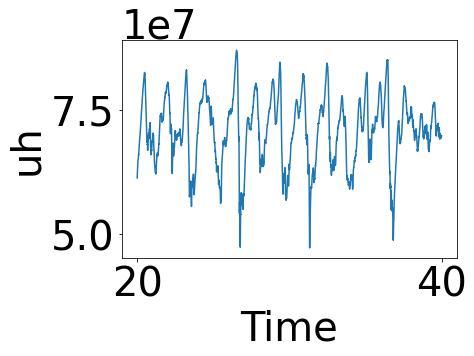

In [63]:
strength.plot()

In [19]:
strength_arr = strength.load()

In [ ]:
strength_arr.to_netcdf(path = "4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_2p0kmres_strength.nc")

In [65]:
## defining ASCintrusion
intrusions = dsx_prog_daily.vh.isel(zl = 2).sel(yq = -100, method = "nearest").sum(dim = 'xh')

In [66]:
intrusions_arr = intrusions.load()

In [67]:
intrusions_arr

<xarray.DataArray 'vh' (Time: 7300)>
array([-125974.16  ,  -28823.035 ,   47199.812 , ...,    4141.8286,
          4962.7944,    5290.818 ], dtype=float32)
Coordinates:
    zl       float64 1.028e+03
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
    yq       float64 -100.0

In [68]:
intrusions_arr.to_netcdf(path = "4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_2p0kmres_intrusion.nc")

In [ ]:
### if reading in files

In [27]:
strength_arr = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_strength.nc').uh.sel(Time = slice(51,71))#.sel(Time = slice(20,30))
intrusions_arr = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_intrusion.nc').vh.sel(Time = slice(51,71))#.sel(Time = slice(20,30))

In [15]:
## MEAN ASC STRENGTH IN SV
(strength_arr/1e6).mean(dim = 'Time').values

array(63.922165, dtype=float32)

In [16]:
(intrusions_arr).mean(dim = 'Time').values

array(-557.713, dtype=float32)

In [87]:
### plotting ASC strength

Text(0.5, 0, 'Time (yrs)')

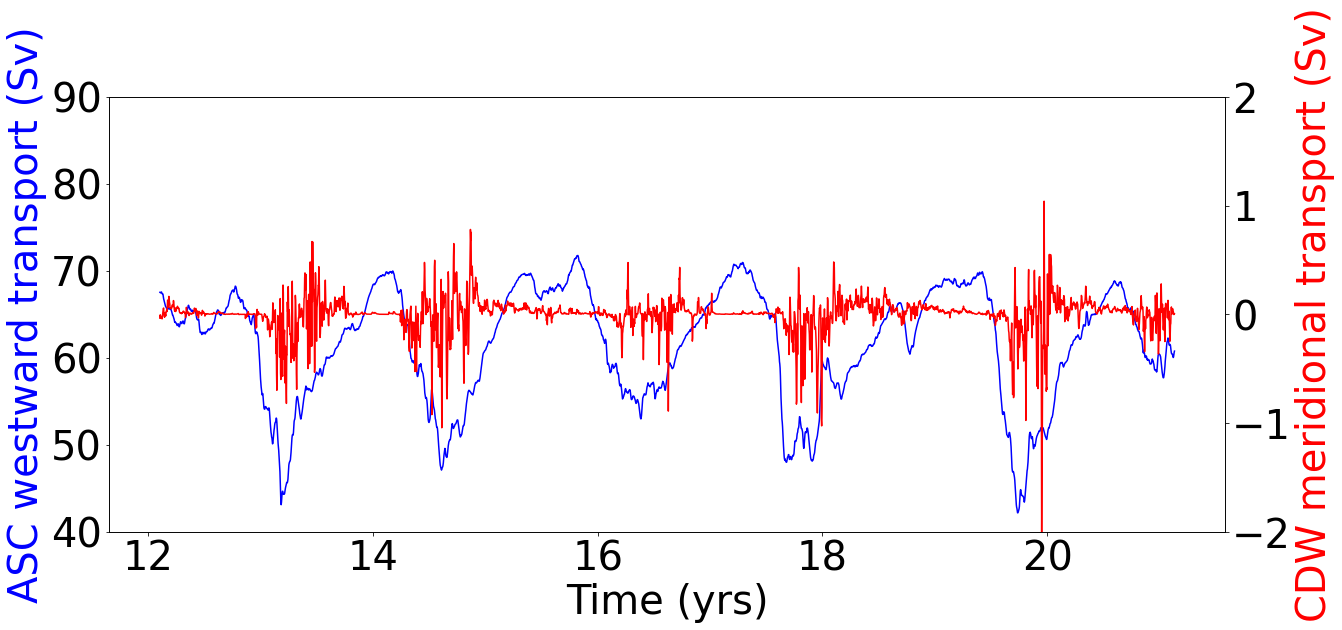

In [88]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot()
(strength_arr/1e6).plot(ax = ax1, color = 'b')
ax1.set_ylabel('ASC westward transport (Sv)', color = 'b')
ax1.set_ylim([4e1,9e1])
#ax1.set_ylim([2e7,7e7])
#ax1.set_ylim([6e7,11e7])

ax2 = ax1.twinx()
(intrusions_arr/1e6).plot(ax = ax2, color = 'r')
ax2.set_ylabel('CDW meridional transport (Sv)', color = 'r')
ax2.set_ylim([-2,2])

#ax1.set_xticks(range(51,72,2))
#ax1.set_xticks(range(20,42,2))

#ax1.set_xticklabels(range(0,22,2))
ax1.set_title('')
ax2.set_title('')

ax1.set_xlabel('Time (yrs)')
#plt.savefig(outfolder + '/ASC_strength_timeseries.pdf')
#plt.savefig(outfolder + '/ASC_strength_timeseries_extend.pdf')

In [17]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:39093': 134,
 'tcp://127.0.0.1:40715': 237,
 'tcp://127.0.0.1:42931': 142,
 'tcp://127.0.0.1:45101': 165}

In [18]:
dx =10**3
dy = 10**3
## CHANGE RESOLUTION

In [91]:
#Calculating EKE using thickness weighted method
#waiting until last step before interpolating onto h grid

In [92]:
u_hat = (dsx_prog_daily.uh.isel(zl = 2).mean(dim = 'Time')/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X').mean(dim = 'Time')
v_hat = (dsx_prog_daily.vh.isel(zl = 2).mean(dim = 'Time')/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend").mean(dim = 'Time')

In [93]:
u_primed = (dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X') - u_hat
v_primed = (dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend") - v_hat

In [94]:
EKE = 1028.2*(dsx_prog_daily.h.isel(zl = 2) * (grid.interp(u_primed, axis = 'X')**2 + grid.interp(v_primed, axis = 'Y')**2)).sel(yh = range(-50,100), method = 'nearest')

In [95]:
EKE_u_interp = EKE.sum(dim = 'xh').sum(dim = 'yh')

In [96]:
EKE_u_interp_arr = EKE_u_interp.load()

In [97]:
EKE_u_interp_arr.to_netcdf(path = "4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_0p5kmres.nc")

Text(0.5, 1.0, '')

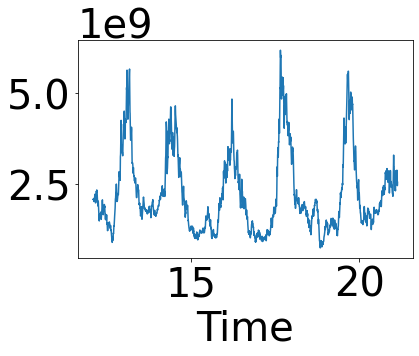

In [98]:
EKE_u_interp_arr.plot()
plt.title('')

Text(0.5, 1.0, '')

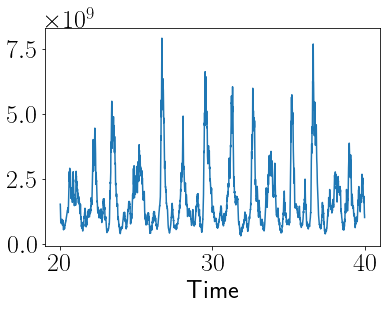

In [75]:
EKE_u_interp_arr.plot()
plt.title('')

In [28]:
EKE_u_interp_arr  = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02.nc').__xarray_dataarray_variable__.sel(Time = slice(51,71))

In [20]:
EKE_u_interp_arr

<xarray.DataArray '__xarray_dataarray_variable__' (Time: 7300)>
dask.array<open_dataset-dcbece44a15d0c68e15ddf172daba028__xarray_dataarray_variable__, shape=(7300,), dtype=float32, chunksize=(7300,), chunktype=numpy.ndarray>
Coordinates:
    zl       float64 ...
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0

In [21]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:39093': 52,
 'tcp://127.0.0.1:40715': 52,
 'tcp://127.0.0.1:42931': 52,
 'tcp://127.0.0.1:45101': 52}

Text(0.5, 1.0, '')

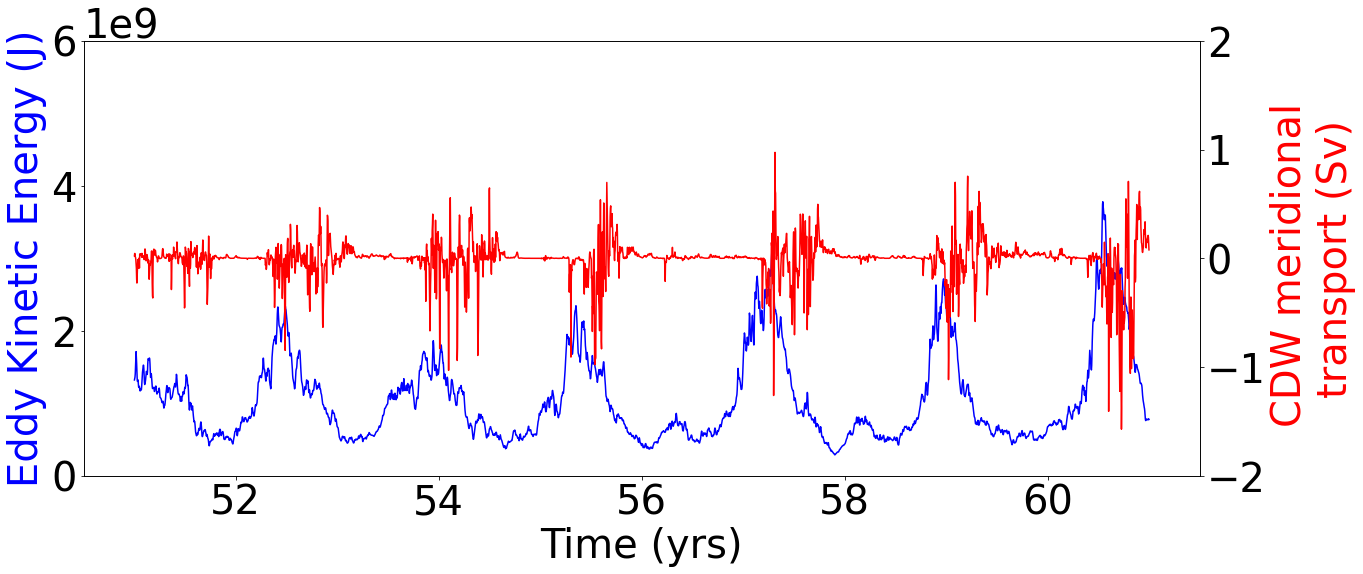

In [109]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot()
EKE_u_interp_arr.isel(Time = range(0,10*365)).plot(ax = ax1, color = 'b', label = 'EKE')
ax1.set_ylim([0,6e9])
#ax1.set_ylim([0,2e15])

ax2 = ax1.twinx()
(intrusions_arr/1e6).isel(Time = range(0,10*365)).plot(ax = ax2, color = 'r', label = 'CDW meridional transport ($m^{3}/s$)')
ax2.set_ylim([-2,2])
#ax2.set_ylim([-1.6e5,1.6e5]) #narrow

ax2.set_ylabel('CDW meridional \ntransport (Sv)', color = 'r')
#ax3 = ax1.twinx()
#ax3.spines.right.set_position(("axes", 1.15))
#APE_bc_sum_arr.plot(ax = ax1, color = 'c', label = 'Baroclinic APE')
#ax3.set_ylabel('Baroclinic APE (J)', color = 'c')
#ax3.get_yaxis().get_offset_text().set_position((1.15,5.0)) 

#ax1.set_xticks(range(51,72,2))
#ax1.set_xticks(range(20,42,2))

#ax1.set_xticklabels(range(0,22,2))
ax1.set_ylabel('Eddy Kinetic Energy (J)', color = 'b') # EKE

ax1.set_xlabel('Time (yrs)')
ax1.set_title('')
ax2.set_title('')
#ax3.set_title('')


## Baroclinic EKE generation 
Baroclinic EKE generation in layer i $$ - u^{''}_i \cdot h_i \nabla \phi^{''}_i$$
where $$\phi_i = \rho_0 g^{'}_i \eta_i + \phi_{i-1}$$ with $$\phi_0 = \rho_0 g \eta_0$$


 g′1= (\rho_2 – \rho_1)g/r0 and g′2 = (\rho_3 – \rho_2) g/r0 , g′3 = (\rho_4 – \rho_2) g/r0

In [7]:
rho_layer = [1027.8, 1028.0, 1028.1, 1028.3]
g = 9.81

In [8]:
reduced_g_layer = np.asarray([g*(rho_layer[1] - rho_layer[0]),g*(rho_layer[2] - rho_layer[1]), g*(rho_layer[3]-rho_layer[2])])/rho_layer[0]
# reduced gravity lives on the interface APE[0],[1],[2],[3]######

In [9]:
reduced_g = np.append(g, reduced_g_layer)
reduced_g

array([9.81000000e+00, 1.90893170e-03, 9.54465849e-04, 1.90893170e-03])

In [20]:
#eta_calc uses in Montgomery potential calculation is same as in APE
eta = dsx_prog_daily.e#.sel(yh = slice(-50,100)))#.isel(zi = slice(1,5))
print(eta)
eta_0 =  -dsx_prog_daily.e.sel(yh = 250, method = 'nearest').mean(dim = ['xh','Time']) # sponging on the northen interface
print(eta_0)
#print(int(eta.isel(zi =2).mean(dim= ['xh','Time']).idxmin().values))
#eta_calc = []
eta_calc = [(- eta.isel(zi=i) - eta_0.isel(zi = i)) for i in range(0,5)]

<xarray.DataArray 'e' (Time: 7300, zi: 5, yh: 500, xh: 1000)>
dask.array<concatenate, shape=(7300, 5, 500, 1000), dtype=float32, chunksize=(20, 5, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * zi       (zi) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 1.028e+03
Attributes:
    units:          m
    long_name:      Interface Height Relative to Mean Sea Level
    cell_methods:   area:mean zi:point yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
<xarray.DataArray 'e' (zi: 5)>
dask.array<neg, shape=(5,), dtype=float32, chunksize=(5,), chunktype=numpy.ndarray>
Coordinates:
    yh       float64 249.5
  * zi       (zi) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 1.028e+03


In [92]:
eta_calc

[<xarray.DataArray 'e' (Time: 7300, yh: 250, xh: 500)>
 dask.array<sub, shape=(7300, 250, 500), dtype=float32, chunksize=(20, 250, 500), chunktype=numpy.ndarray>
 Coordinates:
   * yh       (yh) float64 -249.0 -247.0 -245.0 -243.0 ... 245.0 247.0 249.0
   * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
   * xh       (xh) float64 -499.0 -497.0 -495.0 -493.0 ... 495.0 497.0 499.0
     zi       float64 1.028e+03,
 <xarray.DataArray 'e' (Time: 7300, yh: 250, xh: 500)>
 dask.array<sub, shape=(7300, 250, 500), dtype=float32, chunksize=(20, 250, 500), chunktype=numpy.ndarray>
 Coordinates:
   * yh       (yh) float64 -249.0 -247.0 -245.0 -243.0 ... 245.0 247.0 249.0
   * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0
   * xh       (xh) float64 -499.0 -497.0 -495.0 -493.0 ... 495.0 497.0 499.0
     zi       float64 1.028e+03,
 <xarray.DataArray 'e' (Time: 7300, yh: 250, xh: 500)>
 dask.array<sub, shape=(7300, 250, 500), dtype=float32, chunksize

In [21]:
phi_all = [rho_layer[0]*reduced_g[i]*eta_calc[i] for i in range(4)]

In [22]:
phi_all

[<xarray.DataArray 'e' (Time: 7300, yh: 500, xh: 1000)>
 dask.array<multiply, shape=(7300, 500, 1000), dtype=float32, chunksize=(20, 500, 1000), chunktype=numpy.ndarray>
 Coordinates:
   * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
   * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
   * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
     zi       float64 1.028e+03,
 <xarray.DataArray 'e' (Time: 7300, yh: 500, xh: 1000)>
 dask.array<multiply, shape=(7300, 500, 1000), dtype=float32, chunksize=(20, 500, 1000), chunktype=numpy.ndarray>
 Coordinates:
   * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
   * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
   * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
     zi       float64 1.028e+03,
 <xarray.DataArray 'e' (Time: 7300, yh: 500, xh: 1000)>
 dask.array<multiply, shape=(7300, 500, 1000), d

In [23]:
import pandas as pd

In [24]:
phi_all_final = xr.concat([phi_all[0].drop('zi'),(phi_all[1] + phi_all[0]), (phi_all[2] + phi_all[1] + phi_all[0]), (phi_all[3] + phi_all[2] + phi_all[1] + phi_all[0])], pd.Index(dsx_prog_daily.coords['zl'], name = 'zl'))

In [25]:
phi_all_final

<xarray.DataArray 'e' (zl: 4, Time: 7300, yh: 500, xh: 1000)>
dask.array<concatenate, shape=(4, 7300, 500, 1000), dtype=float32, chunksize=(1, 20, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
    zi       float64 1.028e+03
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03

In [26]:
phi_nc = phi_all_final

In [27]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34101': 197,
 'tcp://127.0.0.1:42813': 197,
 'tcp://127.0.0.1:44933': 197,
 'tcp://127.0.0.1:46075': 197}

In [100]:
## phi should be primed!

In [28]:
phi_bar = phi_nc.rolling(Time=200, center=True).mean()#.dropna("Time")

In [29]:
phi_primed_new = phi_nc.chunk({'Time':20}) - phi_bar

In [30]:
phi_primed_new

<xarray.DataArray 'e' (zl: 4, Time: 7300, yh: 500, xh: 1000)>
dask.array<sub, shape=(4, 7300, 500, 1000), dtype=float32, chunksize=(1, 20, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
    zi       float64 1.028e+03
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03

In [31]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34101': 52,
 'tcp://127.0.0.1:42813': 52,
 'tcp://127.0.0.1:44933': 52,
 'tcp://127.0.0.1:46075': 52}

In [32]:
ds_rolling = xr.merge([dsx_prog_daily.uh.rolling(Time=200, center=True).mean(), dsx_prog_daily.vh.rolling(Time=200, center=True).mean(), grid_new])
ds_rolling #.dropna("Time")

<xarray.Dataset>
Dimensions:  (xq: 1000, yh: 500, zl: 4, Time: 7300, xh: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
Data variables: (12/21)
    uh       (Time, zl, yh, xq) float32 dask.array<chunksize=(200, 4, 500, 1000), meta=np.ndarray>
    vh       (Time, zl, yq, xh) float32 dask.array<chunksize=(200, 4, 500, 1000), meta=np.ndarray>
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    units:          m3 s-1
    long_name:      Zonal Thickness Flux
    cell_methods:   zl:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [33]:
ds_rolling.coords['xh'].attrs.update(axis='X')
ds_rolling.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds_rolling.coords['yh'].attrs.update(axis='Y')
ds_rolling.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds_rolling, periodic=['X'])
grid
#CHANGE RES
dx = 1000
dy = 1000

In [34]:
u_hat_rolling = ((dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X')).rolling(Time=200, center=True).mean()
v_hat_rolling = ((dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend")).rolling(Time=200, center=True).mean()

In [35]:
u_primed_rolling = (dsx_prog_daily.uh.isel(zl = 2)/dy)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'X') - u_hat_rolling
v_primed_rolling = (dsx_prog_daily.vh.isel(zl = 2)/dx)/grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = "extend") - v_hat_rolling

In [36]:
phi_primed_dx = grid.diff(phi_primed_new.isel(zl = 2), axis = 'X')/dx
phi_primed_dy = grid.diff(phi_primed_new.isel(zl = 2), axis = 'Y')/dy

In [37]:
phi_primed_dy.sel(yq = range(-50,100), method = 'nearest')

<xarray.DataArray 'e' (Time: 7300, yq: 150, xh: 1000)>
dask.array<getitem, shape=(7300, 150, 1000), dtype=float32, chunksize=(20, 150, 1000), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 51.0 51.0 51.01 51.01 ... 70.99 70.99 71.0 71.0
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -50.0 -49.0 -48.0 -47.0 -46.0 ... 96.0 97.0 98.0 99.0

In [38]:
interp_phi_primed_dx =  grid.interp(phi_primed_dx, axis = 'X').sel(yh = range(-50,100), method = 'nearest')
interp_phi_primed_dy =  grid.interp(phi_primed_dy, axis = 'Y', boundary = 'extend').sel(yh = range(-50,100), method = 'nearest')


In [39]:
x_comp = grid.interp(u_primed_rolling, axis = 'X').sel(yh = range(-50,100), method = 'nearest') * dsx_prog_daily.h.isel(zl = 2).sel(yh = range(-50,100), method = 'nearest') *interp_phi_primed_dx
c.run(gc.collect)
y_comp = grid.interp(v_primed_rolling, axis = 'Y', boundary = 'extend').sel(yh = range(-50,100), method = 'nearest') * dsx_prog_daily.h.isel(zl = 2).sel(yh = range(-50,100), method = 'nearest') * interp_phi_primed_dy
c.run(gc.collect)

{'tcp://127.0.0.1:34101': 52,
 'tcp://127.0.0.1:42813': 52,
 'tcp://127.0.0.1:44933': 52,
 'tcp://127.0.0.1:46075': 52}

In [40]:
EKE_generation_bc_primed = (x_comp + y_comp).rolling(Time=200, center=True).mean().dropna("Time")

In [41]:
EKE_generation_bc_primed

<xarray.DataArray (Time: 6902, yh: 150, xh: 1000)>
dask.array<getitem, shape=(6902, 150, 1000), dtype=float32, chunksize=(200, 150, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -49.5 -48.5 -47.5 -46.5 -45.5 ... 96.5 97.5 98.5 99.5
  * Time     (Time) float64 51.55 51.55 51.55 51.56 ... 70.45 70.45 70.45 70.46
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
    zl       float64 1.028e+03

In [42]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34101': 779,
 'tcp://127.0.0.1:42813': 528,
 'tcp://127.0.0.1:44933': 451,
 'tcp://127.0.0.1:46075': 1575}

In [129]:
EKE_generation_bc_primed_arr = EKE_generation_bc_primed.sum(dim = 'xh').sum(dim = 'yh').load()

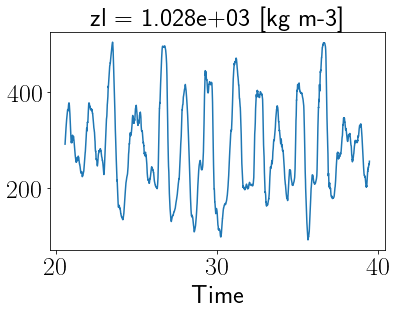

In [130]:
EKE_generation_bc_primed_arr.plot()

In [131]:
EKE_generation_bc_primed_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_2p0kmres_EKEbc_gen_rolling.nc')

# Barotropic EKE generation
Reynolds stress conversion in layer $i$
$$ \rho_0 ( \hat{u}_i \cdot \nabla)\overline{(h_i \mathbf{u^{''}_i} \otimes \mathbf{u^{''}_i})}$$

where 
$$ \nabla(h_i \mathbf{u^{''}_i }\otimes \mathbf{u^{''}_i}) = [ \partial_x( h_i u^{''}_i u^{''}_i ) + \partial_y(h_i u^{''}_i v^{''}_i )) \mathbf{i} 
+  ( \partial_y (h_i v^{''}_i v^{''}_i ) + \partial_x(h_i u^{''}_i v^{''}_i )] \mathbf{j}$$

In [44]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34101': 95,
 'tcp://127.0.0.1:42813': 15,
 'tcp://127.0.0.1:44933': 232,
 'tcp://127.0.0.1:46075': 52}

In [22]:
u_primed_rolling # reminder that u_primed and u_hat are on u grid

<xarray.DataArray (Time: 7300, yh: 250, xq: 500)>
dask.array<sub, shape=(7300, 250, 500), dtype=float32, chunksize=(20, 250, 500), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 -498.0 -496.0 -494.0 -492.0 ... 496.0 498.0 500.0
  * yh       (yh) float64 -249.0 -247.0 -245.0 -243.0 ... 245.0 247.0 249.0
    zl       float64 1.028e+03
  * Time     (Time) float64 20.0 20.0 20.01 20.01 ... 39.99 39.99 40.0 40.0

In [45]:
##reynolds stress? did everything on h grid because I couldn't multiply u and v otherwise
#only for zl = 2 CDW layer
reynolds_x = grid.interp(grid.diff((grid.interp(u_primed_rolling**2, axis = 'X')*dsx_prog_daily.h.isel(zl = 2)).rolling(Time=200, center=True).mean(), axis = 'X')/dx, axis = 'X').sel(yh = range(-50,100), method = 'nearest') + grid.interp(grid.diff((grid.interp(u_primed_rolling, axis = 'X')*grid.interp(v_primed_rolling, axis = 'Y', boundary= "extend") * dsx_prog_daily.h.isel(zl = 2)).rolling(Time=200, center=True).mean(), axis = 'Y')/dy, axis = 'Y', boundary = 'extend').sel(yh = range(-50,100), method = 'nearest')
reynolds_x_coeff =  grid.interp(u_hat_rolling, axis = 'X').sel(yh = range(-50,100), method = 'nearest') * rho_layer[0]
reynolds_x_final = reynolds_x * reynolds_x_coeff

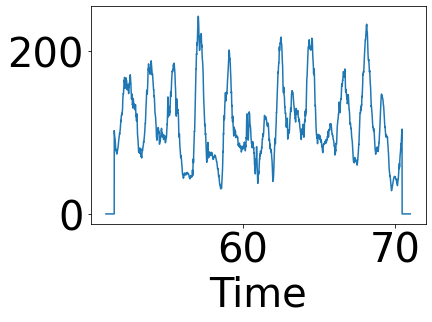

In [46]:
reynolds_x_final.sum(dim = 'xh').sum('yh').plot()

In [ ]:
reynolds_x_final

In [47]:
reynolds_y = (grid.diff((v_primed_rolling**2 * grid.interp(dsx_prog_daily.h.isel(zl = 2), axis = 'Y', boundary = 'extend')).rolling(Time=200, center=True).mean(),axis = 'Y')/dy
            + grid.interp(grid.diff((grid.interp(u_primed_rolling, axis = 'X')*grid.interp(v_primed_rolling, axis = 'Y', boundary= "extend") * dsx_prog_daily.h.isel(zl = 2)).rolling(Time=200, center=True).mean(), axis = 'X'), axis = 'X')/dx)
reynolds_y_coeff = grid.interp(v_hat_rolling,axis = 'Y', boundary = 'extend').sel(yh = range(-50,100), method = 'nearest') * rho_layer[0]
reynolds_y_final = reynolds_y.sel(yh = range(-50,100), method = 'nearest') * reynolds_y_coeff

In [ ]:
reynolds_y_final.sum(dim = 'xh').sum(dim = 'yh').plot()

In [ ]:
reynolds = (reynolds_x_final + reynolds_y_final).sum(dim = 'xh').sum('yh')

In [ ]:
reynolds

In [ ]:
c.run(gc.collect)

2024-03-12 13:04:23,680 - distributed.nanny - WARNING - Worker process still alive after 3.1999989318847657 seconds, killing
2024-03-12 13:04:23,681 - distributed.nanny - WARNING - Worker process still alive after 3.1999995422363288 seconds, killing
2024-03-12 13:04:23,683 - distributed.nanny - WARNING - Worker process still alive after 3.1999995422363288 seconds, killing
2024-03-12 13:04:23,684 - distributed.nanny - WARNING - Worker process still alive after 3.199999389648438 seconds, killing


In [ ]:
reynolds_arr = reynolds.load()

In [ ]:
reynolds_arr.plot()

In [53]:
reynolds_arr.to_netcdf(path = '4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_infinitecanyon_halfg_EKEbt_gen_rolling_update.nc')

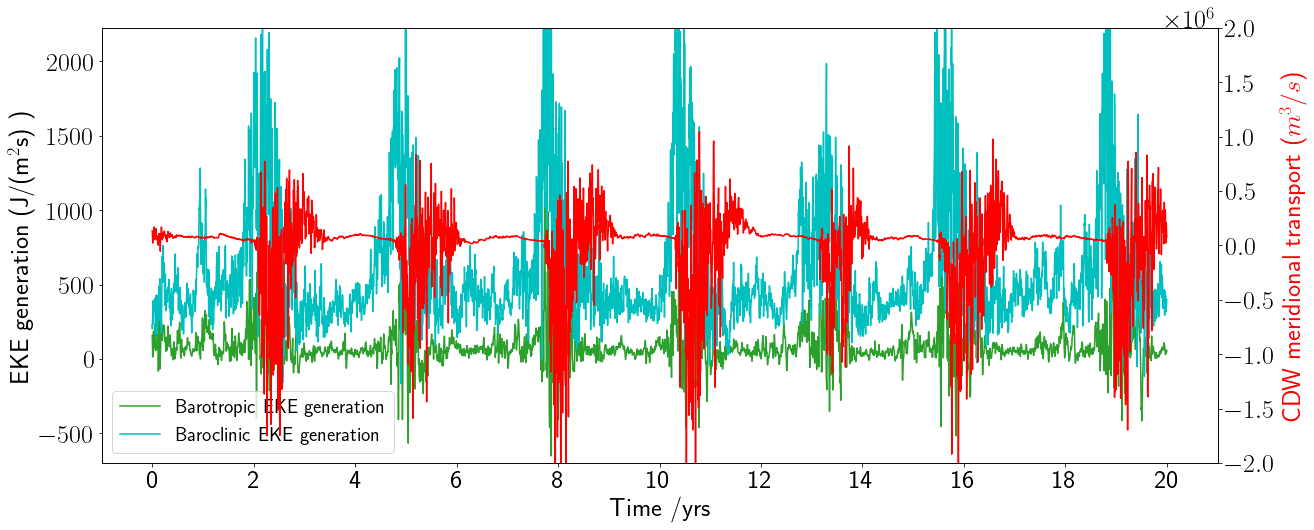

In [101]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot()
#APE_bc_sum_arr.plot(ax = ax1, color = 'c', label = 'Baroclinic APE')
(reynolds_arr).plot(ax = ax1, label = 'Barotropic EKE generation', color = 'C2')
(-EKE_generation_bc_primed_arr).plot(ax = ax1, label = 'Baroclinic EKE generation', color = 'c')
#(-EKE_generation_bc_primed_arr_old).to_array().plot(ax = ax3, label = 'Baroclinic EKE generation old', color = 'k')
ax1.set_ylim([-700,2225])

#(-EKE_generation_bc_arr).to_array().plot(ax = ax3, label = 'Baroclinic EKE generation', color = 'c')

ax1.set_ylabel('EKE generation (J m$^-2$s$^-1$) )', color = 'k')
ax1.get_yaxis().get_offset_text().set_position((1.15,5.0)) 

ax2 = ax1.twinx()
intrusions_arr.plot(ax = ax2, color = 'r', label = 'CDW meridional transport ($m^{3}/s$)')
ax2.set_ylim([-2e6,2e6])
#ax2.set_ylim([-2e5,2e5]) #narrow

ax2.set_ylabel('CDW meridional transport ($m^{3}/s$)', color = 'r')
ax1.set_xticks(range(30,52,2))
ax1.set_xticklabels(range(0,22,2))
ax1.set_xlabel('Time /yrs')
ax1.set_title('')
ax2.set_title('')
ax1.legend()
#plt.savefig(outfolder + 'EKE_generation.pdf')
#plt.savefig(outfolder + 'EKE_generation_CDWexpand.pdf')

In [23]:
# read in files
#EKE_arr = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_2p0kmres.nc').__xarray_dataarray_variable__.sel(Time = slice(20,40))
EKE_generation_bc_primed_arr_load = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_EKEbc_gen_rolling.nc').__xarray_dataarray_variable__.sel(Time = slice(51,71))
EKE_generation_bt_primed_arr_load = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_EKEbt_gen_rolling_update.nc').__xarray_dataarray_variable__.sel(Time = slice(51,71))


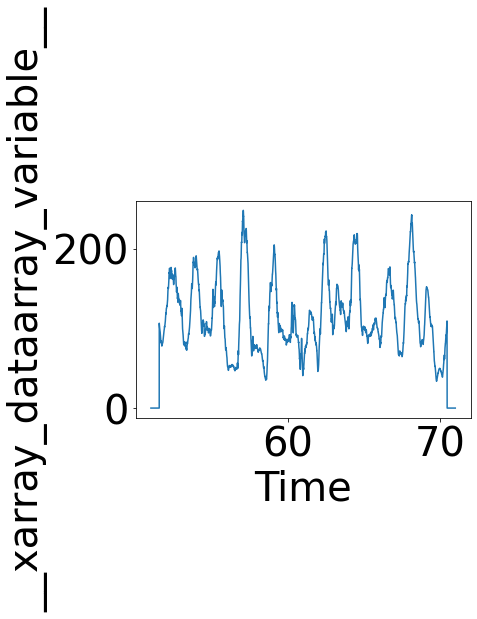

In [24]:
EKE_generation_bt_primed_arr_load.plot()

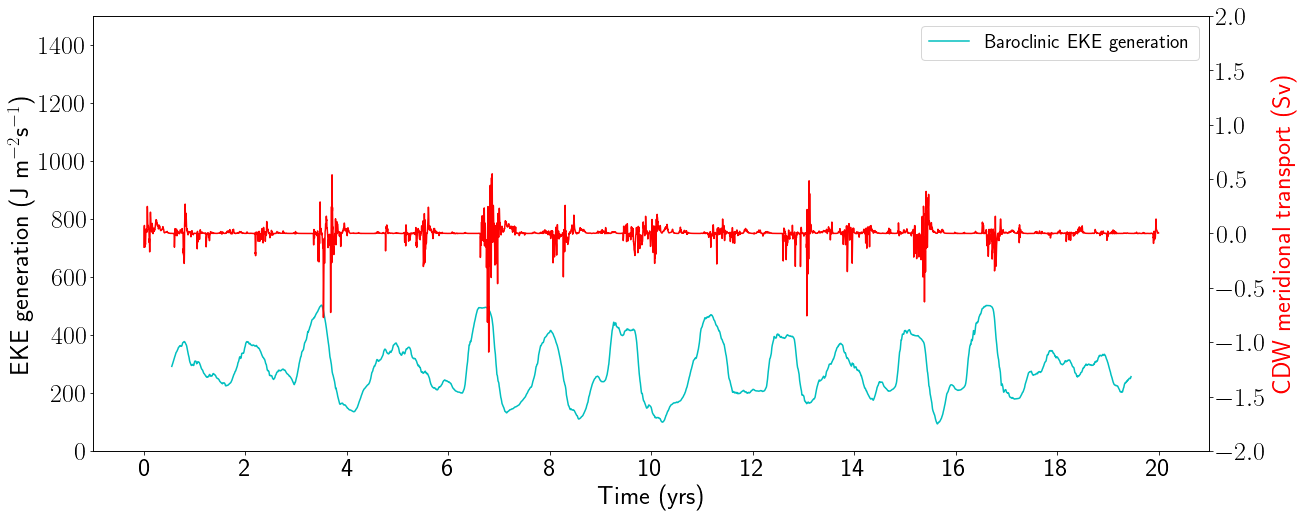

In [137]:
plt.figure(figsize = (20,8))
ax1 = plt.subplot()
#APE_bc_sum_arr.plot(ax = ax1, color = 'c', label = 'Baroclinic APE')
#(EKE_generation_bt_primed_arr_load).plot(ax = ax1, label = 'Barotropic EKE generation', color = 'C2')
(EKE_generation_bc_primed_arr_load).plot(ax = ax1, label = 'Baroclinic EKE generation', color = 'c')
#(-EKE_generation_bc_primed_arr_old).to_array().plot(ax = ax3, label = 'Baroclinic EKE generation old', color = 'k')
ax1.set_ylim([0,1500])

#(-EKE_generation_bc_arr).to_array().plot(ax = ax3, label = 'Baroclinic EKE generation', color = 'c')

ax1.set_ylabel('EKE generation (J m$^{-2}$s$^{-1}$)', color = 'k')
ax1.get_yaxis().get_offset_text().set_position((1.15,5.0)) 

ax2 = ax1.twinx()
(intrusions_arr/1e6).plot(ax = ax2, color = 'r')
ax2.set_ylim([-2,2])
#ax2.set_ylim([-2e5,2e5]) #narrow

ax2.set_ylabel('CDW meridional transport (Sv)', color = 'r')
#ax1.set_xticks(range(51,73,2))
ax1.set_xticks(range(20,41,2))

ax1.set_xticklabels(range(0,22,2))
ax1.set_xlabel('Time (yrs)')
ax1.set_title('')
ax2.set_title('')
ax1.legend()
#plt.savefig(outfolder + 'EKE_generation_extendenergy.pdf')


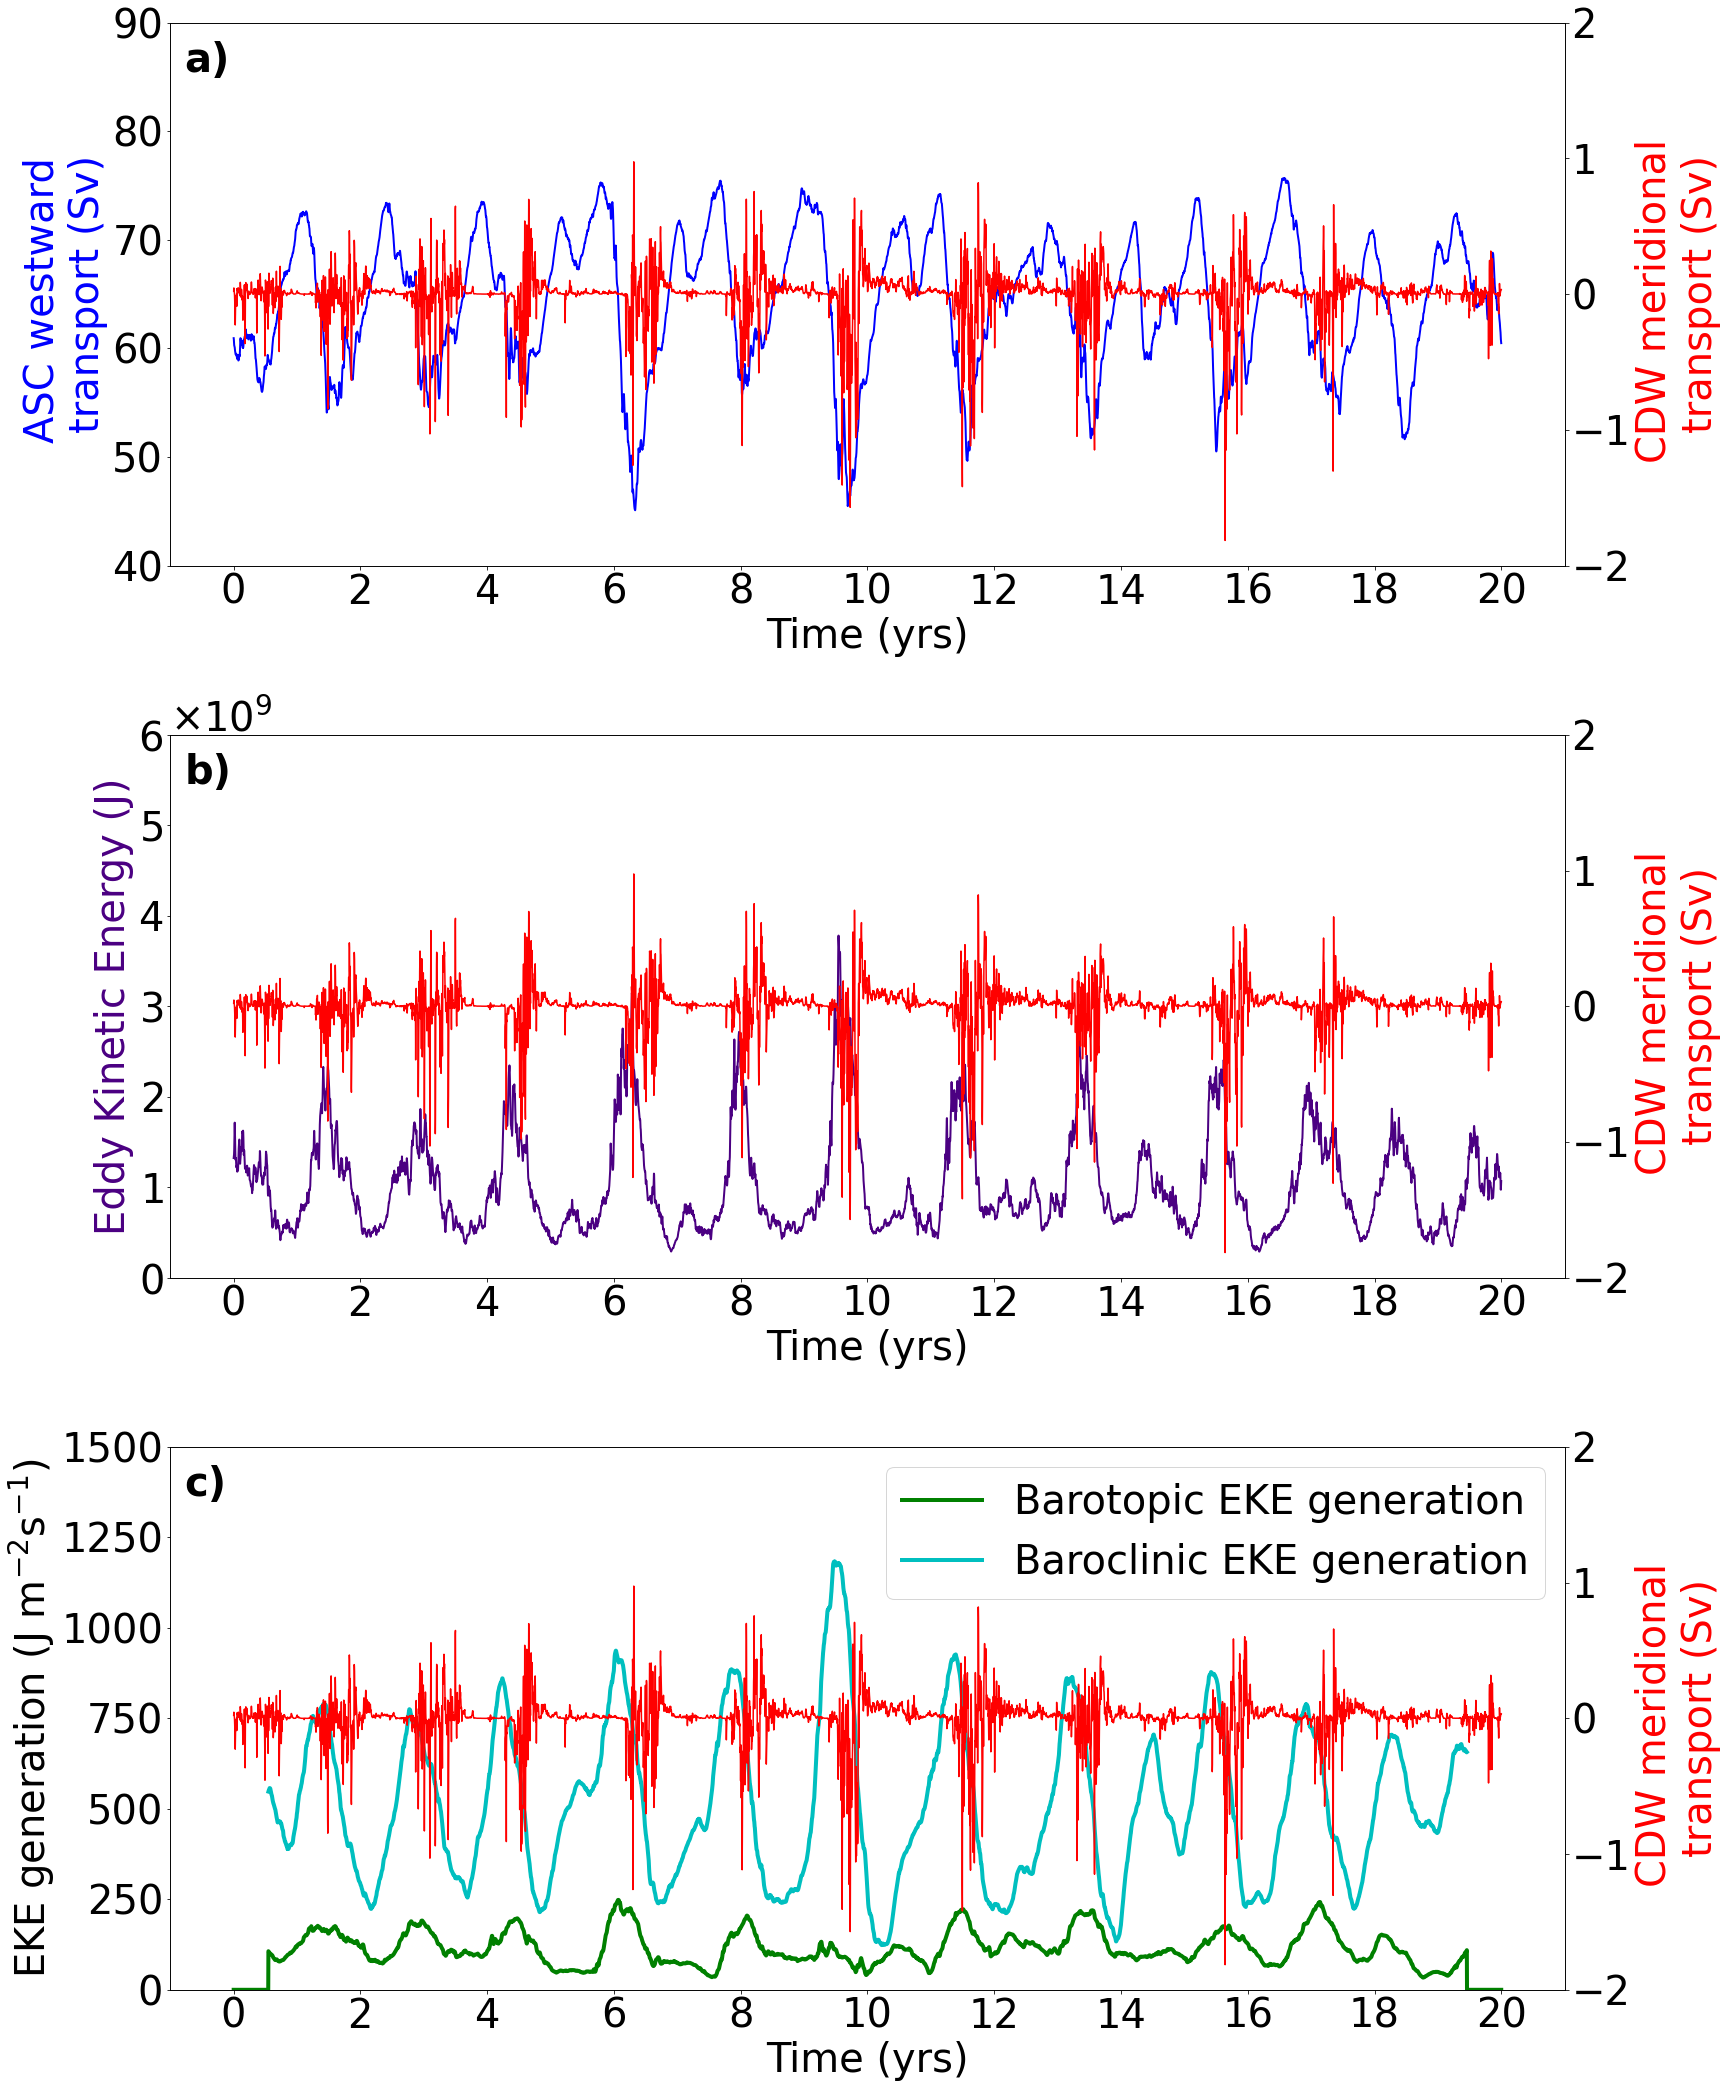

In [48]:
fig, axs = plt.subplots(3, 1, figsize = (25,30))

(strength_arr/1e6).plot(ax = axs[0], color = 'b', lw = 2)
axs[0].set_ylabel('ASC westward \ntransport (Sv)', color = 'b')
axs[0].set_ylim([4e1,9e1])
#ax1.set_ylim([2e7,7e7])
#ax1.set_ylim([6e7,11e7])

ax1 = axs[0].twinx()
(intrusions_arr/1e6).plot(ax = ax1, color = 'r')
ax1.set_ylabel('CDW meridional \ntransport (Sv)', color = 'r')
ax1.set_ylim([-2,2])

axs[0].set_xticks(range(51,72,2))

axs[0].set_xticklabels(range(0,22,2))
axs[0].set_title('')
ax1.set_title('')

axs[0].set_xlabel('Time (yrs)')
axs[0].annotate('a)', xy = (0.01,0.91), xytext = (0,0), textcoords = 'offset points', xycoords = 'axes fraction', fontweight = 'bold')

#EKE 
EKE_u_interp_arr.plot(ax = axs[1], color = 'indigo', label = 'EKE', lw = 2)
axs[1].set_ylim([0,6e9])
axs[1].ticklabel_format(useMathText=True)

ax2 = axs[1].twinx()
(intrusions_arr/1e6).plot(ax = ax2, color = 'r', label = 'CDW meridional transport ($m^{3}/s$)')
ax2.set_ylim([-2,2])

ax2.set_ylabel('CDW meridional \ntransport (Sv)', color = 'r')

axs[1].set_xticks(range(51,72,2))
axs[1].set_xticklabels(range(0,22,2))
axs[1].set_ylabel('Eddy Kinetic Energy (J)', color = 'indigo') # EKE

axs[1].set_xlabel('Time (yrs)')
axs[1].set_title('')
ax2.set_title('')
axs[1].annotate('b)', xy = (0.01,0.91), xytext = (0,0), textcoords = 'offset points', xycoords = 'axes fraction', fontweight = 'bold')


(EKE_generation_bt_primed_arr_load).plot(ax = axs[2], label = 'Barotopic EKE generation', color = 'g', lw = 4)
(EKE_generation_bc_primed_arr_load).plot(ax = axs[2], label = 'Baroclinic EKE generation', color = 'c', lw =4)
axs[2].set_ylim([0,1500])

axs[2].set_ylabel('EKE generation (J m$^{-2}$s$^{-1}$)', color = 'k')
axs[2].get_yaxis().get_offset_text().set_position((1.15,5.0)) 

ax3 = axs[2].twinx()
(intrusions_arr/1e6).plot(ax = ax3, color = 'r')
ax3.set_ylim([-2,2])
ax3.set_ylabel('CDW meridional \ntransport (Sv)', color = 'r')
axs[2].set_xticks(range(51,72,2))

axs[2].set_xticklabels(range(0,22,2))
axs[2].set_xlabel('Time (yrs)')
axs[2].set_title('')
ax3.set_title('')
axs[2].legend()
axs[2].annotate('c)', xy = (0.01,0.91), xytext = (0,0), textcoords = 'offset points', xycoords = 'axes fraction', fontweight = 'bold')

plt.tight_layout()
plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/Fig5_EKE_generation_indigo.pdf')
